In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("../Datasets/netflix_titles.csv")

In [3]:
data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
data["country"].value_counts()

country
United States                             2818
India                                      972
United Kingdom                             419
Japan                                      245
South Korea                                199
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: count, Length: 748, dtype: int64

In [6]:
all_countries = data["country"].dropna().str.split(",").explode().str.strip()

all_countries

0       United States
1        South Africa
4               India
7       United States
7               Ghana
            ...      
8801           Jordan
8802    United States
8804    United States
8805    United States
8806            India
Name: country, Length: 10019, dtype: object

In [7]:
country_count = all_countries.value_counts().head(10)

In [8]:
country_count

country
United States     3690
India             1046
United Kingdom     806
Canada             445
France             393
Japan              318
Spain              232
South Korea        231
Germany            226
Mexico             169
Name: count, dtype: int64

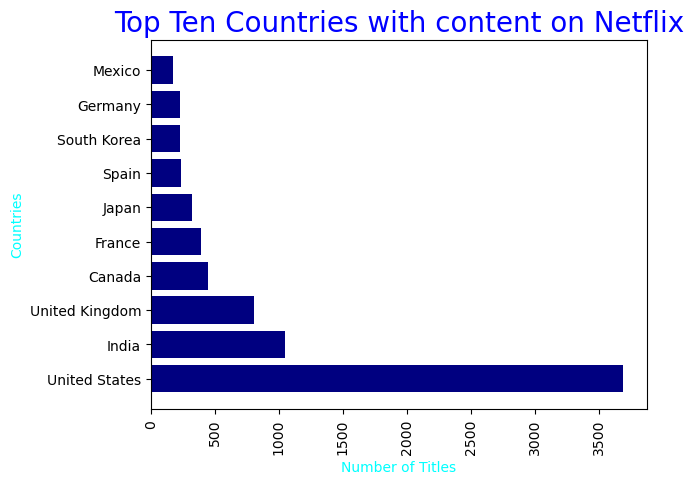

In [16]:
plt.barh(country_count.index, country_count.values, color='navy')
plt.title("Top Ten Countries with content on Netflix", color='blue',fontsize=20)
plt.xticks(rotation=90)
plt.ylabel("Countries", color='cyan')
plt.xlabel("Number of Titles", color='cyan')
plt.show()


In [10]:
data["cast"].value_counts()

cast
David Attenborough                                                                                                                                                                            19
Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jigna Bhardwaj, Rajesh Kava, Mousam, Swapnil                                                                                                       14
Samuel West                                                                                                                                                                                   10
Jeff Dunham                                                                                                                                                                                    7
David Spade, London Hughes, Fortune Feimster                                                                                                                                                   6
                              

In [11]:
all_cast = data["cast"].dropna().str.split(",").explode().str.strip()

all_cast

1                  Ama Qamata
1                 Khosi Ngema
1               Gail Mabalane
1              Thabang Molaba
1            Dillon Windvogel
                ...          
8806         Manish Chaudhary
8806             Meghna Malik
8806            Malkeet Rauni
8806           Anita Shabdish
8806    Chittaranjan Tripathy
Name: cast, Length: 64126, dtype: object

In [12]:
cast_count = all_cast.value_counts().head(10)

In [13]:
cast_count

cast
Anupam Kher         43
Shah Rukh Khan      35
Julie Tejwani       33
Naseeruddin Shah    32
Takahiro Sakurai    32
Rupa Bhimani        31
Akshay Kumar        30
Om Puri             30
Yuki Kaji           29
Paresh Rawal        28
Name: count, dtype: int64

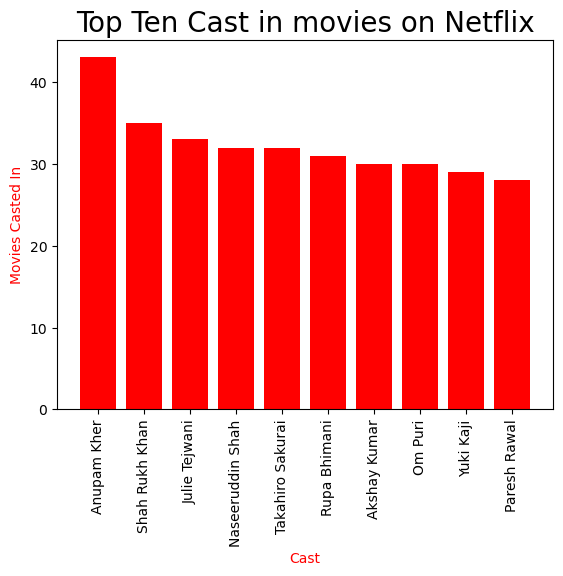

In [18]:
plt.bar(cast_count.index, cast_count.values, color='red')
plt.title("Top Ten Cast in movies on Netflix", fontsize=20)
plt.xticks(rotation=90)
plt.ylabel("Movies Casted In", color='red')
plt.xlabel("Cast", color='red')

plt.show()

## Bivariate 
Movies and TV Shows released per year

In [19]:
types = data.groupby(["release_year", "type"]).size().unstack(fill_value=0).reset_index()

types

type,release_year,Movie,TV Show
0,1925,0,1
1,1942,2,0
2,1943,3,0
3,1944,3,0
4,1945,3,1
...,...,...,...
69,2017,767,265
70,2018,767,380
71,2019,633,397
72,2020,517,436


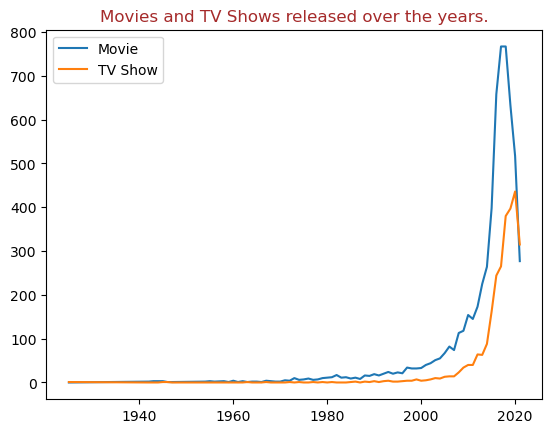

In [24]:
plt.plot(types['release_year'], types['Movie'], label='Movie')
plt.plot(types['release_year'], types['TV Show'], label='TV Show')
plt.legend()
plt.title("Movies and TV Shows released over the years.", color='brown', fontsize=12)

plt.savefig('first_plot.png', dpi=300, bbox_inches='tight')

plt.show()

In [26]:
data['rating'].value_counts()

rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64

In [27]:
data['rating'] = data['rating'].replace({'74 min': 'Unknown', '84 min': 'Unknown', '66 min': 'Unknown'})

In [29]:
rate_by_type = data.groupby(['type', 'rating']).size().unstack(fill_value=0)

rate_by_type

rating,G,NC-17,NR,PG,PG-13,R,TV-14,TV-G,TV-MA,TV-PG,TV-Y,TV-Y7,TV-Y7-FV,UR,Unknown
type,,,,,,,,,,,,,,,
Movie,41,3,75,287,490,797,1427,126,2062,540,131,139,5,3,3
TV Show,0,0,5,0,0,2,733,94,1145,323,176,195,1,0,0


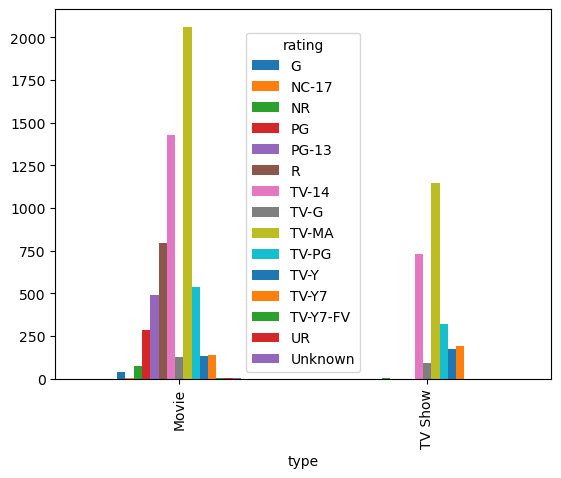

In [33]:
rate_by_type.plot(kind='bar')

plt.show()

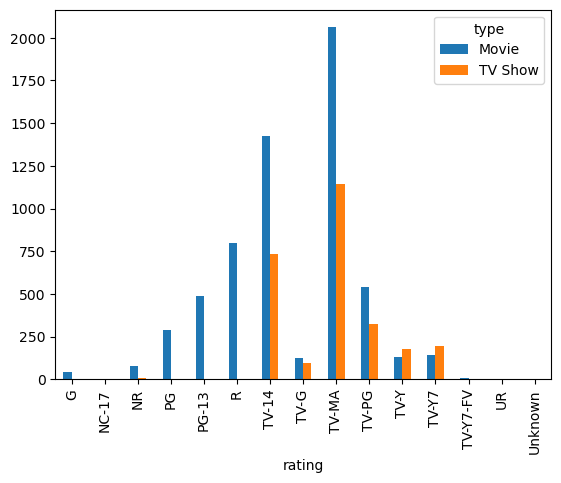

In [31]:
rate_by_type.T.plot(kind='bar')

plt.show()

In [34]:
data['duration'].value_counts()

duration
1 Season     1793
2 Seasons     425
3 Seasons     199
90 min        152
94 min        146
             ... 
16 min          1
186 min         1
193 min         1
189 min         1
191 min         1
Name: count, Length: 220, dtype: int64

In [36]:
data["duration_mins"] = data["duration"].str.extract('(\d+)').astype("float")

In [37]:
data["duration_mins"].value_counts()

duration_mins
1.0      1793
2.0       425
3.0       200
90.0      152
94.0      146
         ... 
189.0       1
273.0       1
212.0       1
224.0       1
191.0       1
Name: count, Length: 210, dtype: int64

In [38]:
data["duration"].value_counts()

duration
1 Season     1793
2 Seasons     425
3 Seasons     199
90 min        152
94 min        146
             ... 
16 min          1
186 min         1
193 min         1
189 min         1
191 min         1
Name: count, Length: 220, dtype: int64

In [39]:
data["duration_mins"] = data["duration_mins"].replace({1.0: 300.00, 2.0: 600.00, 3: 900.00})

In [40]:
duration_by_year = data.groupby("release_year")["duration_mins"].mean().reset_index()

duration_by_year

,release_year,duration_mins
0,1925,300.000000
1,1942,35.000000
2,1943,62.666667
3,1944,52.000000
4,1945,113.500000
...,...,...
69,2017,160.182347
70,2018,189.482127
71,2019,205.919417
72,2020,219.250787


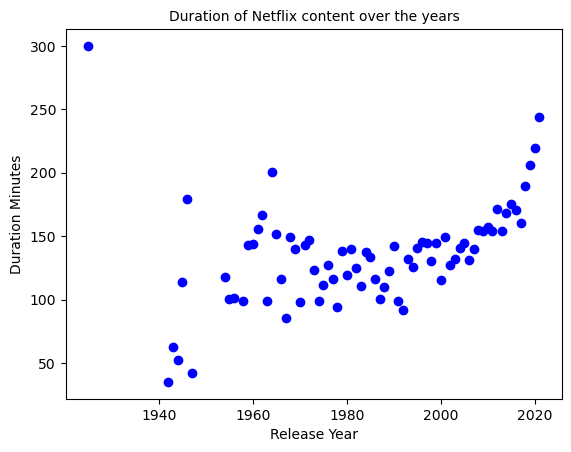

In [41]:
plt.scatter(duration_by_year["release_year"], duration_by_year["duration_mins"], color='blue')
plt.title("Duration of Netflix content over the years", fontsize=10)
plt.xlabel("Release Year")
plt.ylabel("Duration Minutes")

plt.show()